### Placement Assignment Machine Learning

#### Q-8. Quora question pair similarity, you need to find the Similarity between two questions by mapping the words in the questions using TF-IDF, and using a supervised Algorithm you need to find the similarity between the questions.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('train_quora.csv')
new_df = df.sample(30000,random_state=2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [6]:
df.shape, new_df.shape

((404290, 6), (30000, 6))

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 398782 to 312470
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [8]:
new_df.isnull().sum().sum()

0

In [9]:
new_df['is_duplicate'].value_counts()

0    19013
1    10987
Name: is_duplicate, dtype: int64

In [10]:
new_df.duplicated().sum()

0

In [11]:
(new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100

0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64

<AxesSubplot:>

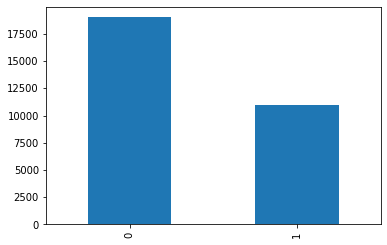

In [12]:
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print(qid.count())
print('Number of unique questions',len(np.unique(qid)))

60000
Number of unique questions 55299


In [14]:
print(qid.value_counts())

2374      8
4044      8
11264     8
1063      7
2439      7
         ..
151429    1
243997    1
106522    1
110122    1
436916    1
Length: 55299, dtype: int64


In [15]:
x = qid.value_counts()>1
count=0
for item in x:
    if item == True:
        count= count+1
#count
print('Number of questions getting repeated',count)

Number of questions getting repeated 3480


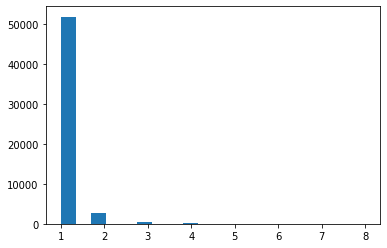

In [16]:
plt.hist(qid.value_counts().values,bins=20)
plt.show()

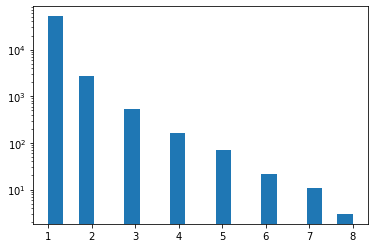

In [17]:
plt.hist(qid.value_counts().values,bins=20)
plt.yscale('log')
plt.show()

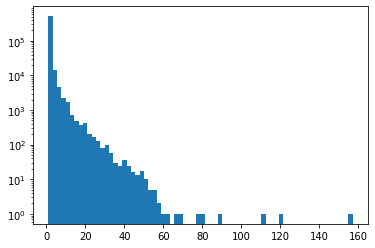

In [18]:
# on total dataset
qid_total = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
plt.hist(qid_total.value_counts().values,bins=70)
plt.yscale('log')
plt.show()

#### Bag of Words

In [19]:

ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [20]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [21]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
71112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [24]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [25]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1
)

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7495

#### TF-IDF

In [29]:

def clean_text(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,
    remove punctuation and remove words containing numbers.
    '''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

## remove_stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    words = text.split(' ')
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

##  stemm_text
stemmer = nltk.SnowballStemmer("english")
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [30]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [32]:
ques_df.shape

(30000, 2)

In [34]:
ques_df["question1and2"] = ques_df['question1'] + ques_df['question2']
ques_df.head()

,question1,question2,question1and2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,I am poor but I want to invest. What should I ...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,I am from India and live abroad. I met a guy f...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,Why do so many people in the U.S. hate the sou...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,Consequences of Bhopal gas tragedy?What was th...


In [35]:
X = ques_df.drop(columns=['question1','question2'])

In [37]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

X['question1and2'] = X['question1and2'].apply(preprocess_data)

In [40]:
y = new_df[['is_duplicate']]

In [41]:
X.shape,y.shape

((30000, 1), (30000, 1))

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24000, 1), (6000, 1), (24000, 1), (6000, 1))

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

#fit_transform for train data
X_train_vec = vectorizer.fit_transform(X_train['question1and2'])

#transform for test data
X_test_vec = vectorizer.transform(X_test['question1and2'])


In [47]:
def evaluate_model(true, predicted):
    accuracy_score1 = accuracy_score(true, predicted)
    return accuracy_score1

In [48]:
models={
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'XGBClassifier':XGBClassifier()
}

trained_model_list=[]
model_list=[]
accuracy_score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_vec,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_vec)
    #print(y_pred.shape)
    #print(y_test.shape)
    accuracy_score1=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Accuracy score",accuracy_score1)

    accuracy_score_list.append(accuracy_score1)
    
    print('='*35)
    print('\n')

LogisticRegression
Accuracy score 0.72


DecisionTreeClassifier
Accuracy score 0.6718333333333333


RandomForestClassifier
Accuracy score 0.741


XGBClassifier
Accuracy score 0.7123333333333334


